In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
import imblearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
credit_churn_dataset= pd.read_csv('../content/sample_data/credit_card_churn.csv')
#### drop off the last 2 columns [ as they are not neccessary]
credit_churn_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
credit_churn_dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#### here Attrition_Flag is the dependent variable
#### first let's split the data into train and test and then use the train for further analysis
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(credit_churn_dataset.drop('Attrition_Flag',axis=1),credit_churn_dataset['Attrition_Flag'],random_state=0,test_size=0.2,stratify=credit_churn_dataset['Attrition_Flag'])
train_df= pd.concat([X_train,y_train],axis=1)
X_test_copy= X_test.copy()
y_test_copy= y_test.copy()
train_df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
839,710574558,47,M,4,Graduate,Single,$80K - $120K,Blue,41,5,...,2,26442.0,1642,24800.0,0.651,1403,40,0.429,0.062,Existing Customer
90,717539808,51,F,2,High School,Single,Less than $40K,Blue,36,3,...,2,9930.0,0,9930.0,0.731,1276,21,1.333,0.000,Existing Customer
8273,719926683,41,M,3,High School,Divorced,$60K - $80K,Blue,33,2,...,2,20749.0,2171,18578.0,0.842,4754,77,0.674,0.105,Existing Customer
5304,712549758,40,F,4,Graduate,Married,Unknown,Blue,25,6,...,1,25060.0,0,25060.0,0.758,3749,61,0.743,0.000,Existing Customer
7406,818993508,52,F,3,Graduate,Married,Less than $40K,Blue,47,4,...,2,2577.0,879,1698.0,0.740,5021,75,0.744,0.341,Existing Customer


## Punto 4: Experimentos

In [ ]:
#### now we will be using train_df for studying the dataset, doing eda and training the model/algorithm
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 839 to 10051
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_O

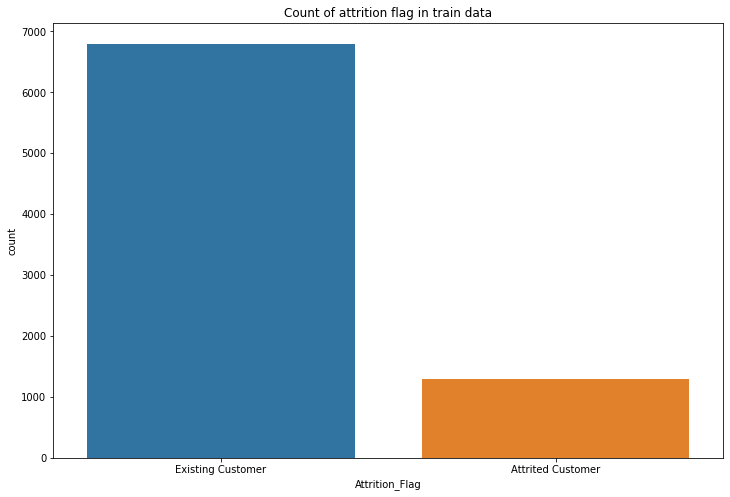

In [ ]:
#### find the propotion of Attrion Flag in train_df data
plt.figure(figsize=(12,8))
sb.countplot(data=train_df,x='Attrition_Flag')
plt.title('Count of attrition flag in train data')
plt.show()

# **Construcción de modelos**



In [ ]:
#### Función métricas de validación
import sklearn.metrics as sm
def get_metrics(y_test,y_pred):
    print(f'The accuracy of model is {sm.accuracy_score(y_test,y_pred)}')
    print()
    print('-----------The classification report is ----------')
    print(sm.classification_report(y_test,y_pred))

In [ ]:
####convert it into one hot encoding data 
X_test.drop('CLIENTNUM',axis=1,inplace=True)
for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(X_test[i],drop_first=True,prefix=i)
    X_test= pd.concat([X_test,tempdf],axis=1)
    X_test.drop(i,axis=1,inplace=True)

X_test.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
7230,45,0,40,5,4,0,2557.0,1898,659.0,0.772,...,1,0,0,0,0,0,1,0,0,0
1394,64,0,55,5,3,4,2492.0,1424,1068.0,0.485,...,0,0,0,0,0,1,0,0,0,0
2967,49,2,41,5,3,4,5984.0,0,5984.0,0.551,...,1,0,0,0,0,0,1,0,0,0
7892,47,2,36,1,3,3,2780.0,2216,564.0,0.826,...,0,0,0,0,0,1,0,0,0,0
6725,49,2,34,6,1,3,3017.0,0,3017.0,0.702,...,0,0,0,0,0,0,1,0,0,0


## Gradient Boosting Tree


In [ ]:
### label encoding data
from sklearn.preprocessing import LabelEncoder
label_dict= {col:LabelEncoder() for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']}
for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    train_df[col]= label_dict[col].fit_transform(train_df[col])

##### Tree models

X_tree= train_df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y_tree= train_df['Attrition_Flag']



In [ ]:
X_tree

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
839,47,1,4,2,2,3,0,41,5,3,2,26442.0,1642,24800.0,0.651,1403,40,0.429,0.062
90,51,0,2,3,2,4,0,36,3,2,2,9930.0,0,9930.0,0.731,1276,21,1.333,0.000
8273,41,1,3,3,0,2,0,33,2,2,2,20749.0,2171,18578.0,0.842,4754,77,0.674,0.105
5304,40,0,4,2,1,5,0,25,6,2,1,25060.0,0,25060.0,0.758,3749,61,0.743,0.000
7406,52,0,3,2,1,4,0,47,4,4,2,2577.0,879,1698.0,0.740,5021,75,0.744,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,47,0,5,1,1,1,0,40,6,1,1,4748.0,1008,3740.0,0.484,3197,70,0.707,0.212
5991,44,1,4,4,1,2,0,36,3,2,2,3117.0,1400,1717.0,0.913,4391,85,0.809,0.449
3643,44,0,3,3,1,5,0,38,4,6,4,26516.0,1434,25082.0,0.472,3609,76,0.551,0.054
8568,29,0,0,0,1,4,0,19,2,1,2,3261.0,2517,744.0,0.636,2461,54,0.742,0.772


In [ ]:
X_tree_test= X_test_copy.copy()
X_tree_test= X_tree_test.drop('CLIENTNUM',axis=1)
y_tree_test= y_test_copy.copy()
for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    X_tree_test[col]= label_dict[col].fit_transform(X_tree_test[col])
    
X_tree_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7230,45,0,0,3,2,5,0,40,5,4,0,2557.0,1898,659.0,0.772,4808,83,0.694,0.742
1394,64,1,0,0,1,4,0,55,5,3,4,2492.0,1424,1068.0,0.485,1375,30,0.364,0.571
2967,49,0,2,6,2,5,0,41,5,3,4,5984.0,0,5984.0,0.551,1838,42,0.556,0.000
7892,47,0,2,0,1,4,0,36,1,3,3,2780.0,2216,564.0,0.826,4980,78,0.857,0.797
6725,49,0,2,5,1,5,0,34,6,1,3,3017.0,0,3017.0,0.702,4389,72,0.636,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,36,0,2,3,2,4,0,36,6,2,5,8087.0,1263,6824.0,0.615,2429,69,0.643,0.156
9622,50,1,4,2,1,3,0,39,3,1,2,11900.0,1796,10104.0,0.651,14666,101,0.980,0.151
3889,58,1,2,5,2,3,0,52,1,2,4,3091.0,2517,574.0,0.602,1844,49,0.633,0.814
4321,43,1,1,4,2,2,0,38,4,2,3,2387.0,1482,905.0,0.868,3909,67,0.675,0.621


In [ ]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.4)
X_tree,y_tree= oversample.fit_resample(X_tree,y_tree)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc_clf.fit(X_tree,y_tree)
y_trainpred= gbc_clf.predict(X_tree)
y_testpred= gbc_clf.predict(X_tree_test)

In [ ]:
print('train data results')
get_metrics(y_tree,y_trainpred)

train data results
The accuracy of model is 0.9627022483715066

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.93      0.94      0.93      2719
Existing Customer       0.97      0.97      0.97      6799

         accuracy                           0.96      9518
        macro avg       0.95      0.95      0.95      9518
     weighted avg       0.96      0.96      0.96      9518



In [ ]:
print('test data results')
get_metrics(y_tree_test,y_testpred)

test data results
The accuracy of model is 0.9555774925962488

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.85      0.87      0.86       325
Existing Customer       0.98      0.97      0.97      1701

         accuracy                           0.96      2026
        macro avg       0.92      0.92      0.92      2026
     weighted avg       0.96      0.96      0.96      2026



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


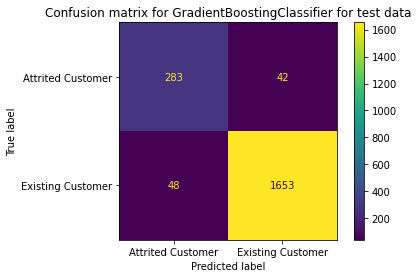

In [ ]:
sm.plot_confusion_matrix(gbc_clf,X_tree_test,y_tree_test)
plt.title('Confusion matrix for GradientBoostingClassifier for test data')
plt.show()

Lo siguiente es la cross-validation con StratifiedKFolds

In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

skf = StratifiedKFold(n_splits=5)

## DATA
df = pd.read_csv('../content/sample_data/credit_card_churn.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
target = df.loc[:,'Attrition_Flag']

### label encoding data
from sklearn.preprocessing import LabelEncoder
label_dict= {col:LabelEncoder() for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']}
for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    df[col]= label_dict[col].fit_transform(df[col])

##Model
gbc_clf= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

fold_no = 1
for train_index, test_index in skf.split(df, target):
  #Splitting train/test data
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  X_train= train.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_train= train['Attrition_Flag']
  X_test =test.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_test =test['Attrition_Flag']

  #Oversampling
  from imblearn.over_sampling import RandomOverSampler
  oversample= RandomOverSampler(sampling_strategy=0.4)
  X_train,y_train= oversample.fit_resample(X_train,y_train)

  gbc_clf.fit(X_train,y_train)
  prediction= gbc_clf.predict(X_test)

  print('test data results for fold #',fold_no)
  get_metrics(y_test,prediction)

  fold_no += 1

test data results for fold # 1
The accuracy of model is 0.8825271470878578

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.65      0.59      0.62       326
Existing Customer       0.92      0.94      0.93      1700

         accuracy                           0.88      2026
        macro avg       0.79      0.76      0.77      2026
     weighted avg       0.88      0.88      0.88      2026

test data results for fold # 2
The accuracy of model is 0.9072063178677197

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.65      0.94      0.76       326
Existing Customer       0.99      0.90      0.94      1700

         accuracy                           0.91      2026
        macro avg       0.82      0.92      0.85      2026
     weighted avg       0.93      0.91      0.91      2026

test data results for fold # 3
T

## SVM


In [ ]:
X= train_df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y= train_df['Attrition_Flag']

In [ ]:
####convert it into one hot encoding data for SVM
X_svm= X.copy()

for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(X_svm[i],drop_first=True,prefix=i)
    X_svm= pd.concat([X_svm,tempdf],axis=1)
    X_svm.drop(i,axis=1,inplace=True)
    
X_svm.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
839,47,4,41,5,3,2,26442.0,1642,24800.0,0.651,...,1,0,0,0,1,0,0,0,0,0
90,51,2,36,3,2,2,9930.0,0,9930.0,0.731,...,1,0,0,0,0,1,0,0,0,0
8273,41,3,33,2,2,2,20749.0,2171,18578.0,0.842,...,0,0,0,1,0,0,0,0,0,0
5304,40,4,25,6,2,1,25060.0,0,25060.0,0.758,...,0,0,0,0,0,0,1,0,0,0
7406,52,3,47,4,4,2,2577.0,879,1698.0,0.740,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#### oversampling the minority class
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.4)
X_svm,y= oversample.fit_resample(X_svm,y)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_svm,y)

SVC(kernel='linear')

In [ ]:
#Predict the response for test dataset
y_testpred= svm_clf.predict(X_test)
y_trainpred= svm_clf.predict(X_svm)

In [ ]:
print('train data results')
get_metrics(y,y_trainpred)

train data results
The accuracy of model is 0.8539609161588569

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.78      0.68      0.73      2719
Existing Customer       0.88      0.93      0.90      6799

         accuracy                           0.85      9518
        macro avg       0.83      0.80      0.81      9518
     weighted avg       0.85      0.85      0.85      9518



In [ ]:
print('test data results')
get_metrics(y_test,y_testpred)

test data results
The accuracy of model is 0.8810463968410661

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.62      0.69      0.65       325
Existing Customer       0.94      0.92      0.93      1701

         accuracy                           0.88      2026
        macro avg       0.78      0.80      0.79      2026
     weighted avg       0.89      0.88      0.88      2026



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


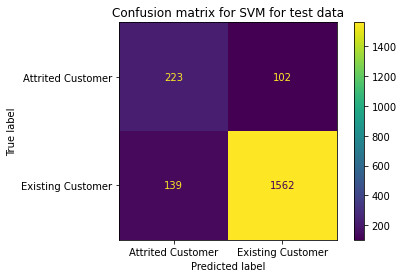

In [ ]:
sm.plot_confusion_matrix(svm_clf,X_test,y_test)
plt.title('Confusion matrix for SVM for test data')
plt.show()

Cross-validation con K folds:

In [ ]:
import sklearn.metrics as sm
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

df = pd.read_csv('../content/sample_data/credit_card_churn.csv')
target = df.loc[:,'Attrition_Flag']

####convert it into one hot encoding data for SVM

for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(df[i],drop_first=True,prefix=i)
    df= pd.concat([df,tempdf],axis=1)
    df.drop(i,axis=1,inplace=True)

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

fold_no = 1
for train_index, test_index in skf.split(df, target):
  #Splitting train/test data
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  X_train= train.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_train= train['Attrition_Flag']
  X_test =test.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_test =test['Attrition_Flag']

  #Oversampling
  from imblearn.over_sampling import RandomOverSampler
  oversample= RandomOverSampler(sampling_strategy=0.4)
  X_train,y_train= oversample.fit_resample(X_train,y_train)


  #Train the model using the training sets
  svm_clf.fit(X_train,y_train)
  prediction = svm_clf.predict(X_test)

  print('test data results for ',fold_no,' folds:')
  get_metrics(y_test,prediction)

  fold_no += 1

test data results for  1  folds:
The accuracy of model is 0.8109575518262586

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.46      0.98      0.63       326
Existing Customer       1.00      0.78      0.87      1700

         accuracy                           0.81      2026
        macro avg       0.73      0.88      0.75      2026
     weighted avg       0.91      0.81      0.83      2026

test data results for  2  folds:
The accuracy of model is 0.9851924975320829

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.94      0.98      0.95       326
Existing Customer       1.00      0.99      0.99      1700

         accuracy                           0.99      2026
        macro avg       0.97      0.98      0.97      2026
     weighted avg       0.99      0.99      0.99      2026

test data results for  3  fo

## Análisis discriminante cuadrático



In [ ]:
X_train= train_df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y_train= train_df['Attrition_Flag']

In [ ]:
####convert it into one hot encoding data for SVM
X_qda= X_train.copy()

for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(X_qda[i],drop_first=True,prefix=i)
    X_qda= pd.concat([X_qda,tempdf],axis=1)
    X_qda.drop(i,axis=1,inplace=True)
    
X_qda.head()




,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
839,47,4,41,5,3,2,26442.0,1642,24800.0,0.651,...,1,0,0,0,1,0,0,0,0,0
90,51,2,36,3,2,2,9930.0,0,9930.0,0.731,...,1,0,0,0,0,1,0,0,0,0
8273,41,3,33,2,2,2,20749.0,2171,18578.0,0.842,...,0,0,0,1,0,0,0,0,0,0
5304,40,4,25,6,2,1,25060.0,0,25060.0,0.758,...,0,0,0,0,0,0,1,0,0,0
7406,52,3,47,4,4,2,2577.0,879,1698.0,0.740,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_test.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
7230,45,0,40,5,4,0,2557.0,1898,659.0,0.772,...,1,0,0,0,0,0,1,0,0,0
1394,64,0,55,5,3,4,2492.0,1424,1068.0,0.485,...,0,0,0,0,0,1,0,0,0,0
2967,49,2,41,5,3,4,5984.0,0,5984.0,0.551,...,1,0,0,0,0,0,1,0,0,0
7892,47,2,36,1,3,3,2780.0,2216,564.0,0.826,...,0,0,0,0,0,1,0,0,0,0
6725,49,2,34,6,1,3,3017.0,0,3017.0,0.702,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.4)
X_qda,y_train= oversample.fit_resample(X_qda,y_train)

In [ ]:
from sklearn import discriminant_analysis

qda_clf = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_clf.fit(X_qda, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
y_testpred= qda_clf.predict(X_test)
y_trainpred= qda_clf.predict(X_qda)

In [ ]:
print('train data results')
get_metrics(y_train,y_trainpred)

train data results
The accuracy of model is 0.8841143097289347

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.78      0.82      0.80      2719
Existing Customer       0.93      0.91      0.92      6799

         accuracy                           0.88      9518
        macro avg       0.86      0.87      0.86      9518
     weighted avg       0.89      0.88      0.88      9518



In [ ]:
print('test data results')
get_metrics(y_test,y_testpred)

test data results
The accuracy of model is 0.8904244817374136

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.63      0.78      0.70       325
Existing Customer       0.96      0.91      0.93      1701

         accuracy                           0.89      2026
        macro avg       0.79      0.85      0.81      2026
     weighted avg       0.90      0.89      0.90      2026



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


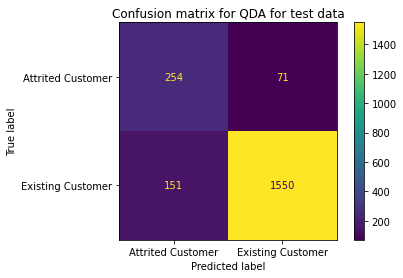

In [ ]:
sm.plot_confusion_matrix(qda_clf,X_test,y_test)
plt.title('Confusion matrix for QDA for test data')
plt.show()

K FOLDS:

In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import StratifiedKFold
from sklearn import discriminant_analysis


skf = StratifiedKFold(n_splits=5)

## DATA
df = pd.read_csv('../content/sample_data/credit_card_churn.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
target = df.loc[:,'Attrition_Flag']

### label encoding data
from sklearn.preprocessing import LabelEncoder
label_dict= {col:LabelEncoder() for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']}
for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    df[col]= label_dict[col].fit_transform(df[col])

##Model
qda_clf = discriminant_analysis.QuadraticDiscriminantAnalysis()

fold_no = 1
for train_index, test_index in skf.split(df, target):
  #Splitting train/test data
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  X_train= train.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_train= train['Attrition_Flag']
  X_test =test.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_test =test['Attrition_Flag']

  #Oversampling
  from imblearn.over_sampling import RandomOverSampler
  oversample= RandomOverSampler(sampling_strategy=0.4)
  X_train,y_train= oversample.fit_resample(X_train,y_train)

  qda_clf.fit(X_train, y_train)
  prediction= qda_clf.predict(X_test)

  print('test data results for fold #',fold_no)
  get_metrics(y_test,prediction)

  fold_no += 1

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test data results for fold # 1
The accuracy of model is 0.5004935834155972

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.24      0.94      0.38       326
Existing Customer       0.98      0.42      0.58      1700

         accuracy                           0.50      2026
        macro avg       0.61      0.68      0.48      2026
     weighted avg       0.86      0.50      0.55      2026

test data results for fold # 2
The accuracy of model is 0.7161895360315893

-----------The classification report is ----------


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                   precision    recall  f1-score   support

Attrited Customer       0.36      0.95      0.52       326
Existing Customer       0.99      0.67      0.80      1700

         accuracy                           0.72      2026
        macro avg       0.67      0.81      0.66      2026
     weighted avg       0.88      0.72      0.75      2026

test data results for fold # 3
The accuracy of model is 0.7723456790123456

-----------The classification report is ----------


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                   precision    recall  f1-score   support

Attrited Customer       0.41      0.95      0.57       325
Existing Customer       0.99      0.74      0.84      1700

         accuracy                           0.77      2025
        macro avg       0.70      0.84      0.71      2025
     weighted avg       0.89      0.77      0.80      2025

test data results for fold # 4
The accuracy of model is 0.9259259259259259

-----------The classification report is ----------


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                   precision    recall  f1-score   support

Attrited Customer       0.70      0.95      0.80       325
Existing Customer       0.99      0.92      0.95      1700

         accuracy                           0.93      2025
        macro avg       0.84      0.94      0.88      2025
     weighted avg       0.94      0.93      0.93      2025

test data results for fold # 5
The accuracy of model is 0.8419753086419753

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.78      0.02      0.04       325
Existing Customer       0.84      1.00      0.91      1700

         accuracy                           0.84      2025
        macro avg       0.81      0.51      0.48      2025
     weighted avg       0.83      0.84      0.77      2025



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Ventana de parzen (método Kernel)

In [ ]:
X_train= train_df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y_train= train_df['Attrition_Flag']

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
X_kde= X_train.copy()

for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(X_kde[i],drop_first=True,prefix=i)
    X_kde= pd.concat([X_kde,tempdf],axis=1)
    X_kde.drop(i,axis=1,inplace=True)
    
X_kde.head()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
839,47,4,41,5,3,2,26442.0,1642,24800.0,0.651,...,1,0,0,0,1,0,0,0,0,0
90,51,2,36,3,2,2,9930.0,0,9930.0,0.731,...,1,0,0,0,0,1,0,0,0,0
8273,41,3,33,2,2,2,20749.0,2171,18578.0,0.842,...,0,0,0,1,0,0,0,0,0,0
5304,40,4,25,6,2,1,25060.0,0,25060.0,0.758,...,0,0,0,0,0,0,1,0,0,0
7406,52,3,47,4,4,2,2577.0,879,1698.0,0.740,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.4)
X_kde,y_train= oversample.fit_resample(X_kde,y_train)

In [ ]:
kde_clf = KernelDensity()
kde_clf.fit(X_kde)
log_dens = kde_clf.score_samples(X_test)

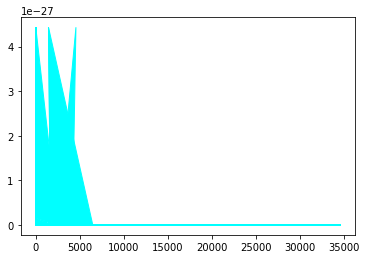

In [ ]:
plt.fill(X_test, np.exp(log_dens), c='cyan')
plt.show()

## Red Neuronal Artificial

In [ ]:
X_train= train_df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y_train= train_df['Attrition_Flag']

In [ ]:
X_ann= X_train.copy()

for i in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    tempdf= pd.get_dummies(X_ann[i],drop_first=True,prefix=i)
    X_ann= pd.concat([X_ann,tempdf],axis=1)
    X_ann.drop(i,axis=1,inplace=True)
    
X_ann.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
839,47,4,41,5,3,2,26442.0,1642,24800.0,0.651,...,1,0,0,0,1,0,0,0,0,0
90,51,2,36,3,2,2,9930.0,0,9930.0,0.731,...,1,0,0,0,0,1,0,0,0,0
8273,41,3,33,2,2,2,20749.0,2171,18578.0,0.842,...,0,0,0,1,0,0,0,0,0,0
5304,40,4,25,6,2,1,25060.0,0,25060.0,0.758,...,0,0,0,0,0,0,1,0,0,0
7406,52,3,47,4,4,2,2577.0,879,1698.0,0.740,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample= RandomOverSampler(sampling_strategy=0.4)
X_ann,y_train= oversample.fit_resample(X_ann,y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_ann,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [ ]:
y_testpred= mlp.predict(X_test)
y_trainpred= mlp.predict(X_ann)

In [ ]:
print('train data results')
get_metrics(y_train,y_trainpred)

train data results
The accuracy of model is 0.7985921412061358

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.75      0.45      0.56      2719
Existing Customer       0.81      0.94      0.87      6799

         accuracy                           0.80      9518
        macro avg       0.78      0.69      0.71      9518
     weighted avg       0.79      0.80      0.78      9518



In [ ]:
print('test data results')
get_metrics(y_test,y_testpred)

test data results
The accuracy of model is 0.8637709772951628

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.60      0.44      0.51       325
Existing Customer       0.90      0.94      0.92      1701

         accuracy                           0.86      2026
        macro avg       0.75      0.69      0.71      2026
     weighted avg       0.85      0.86      0.85      2026



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


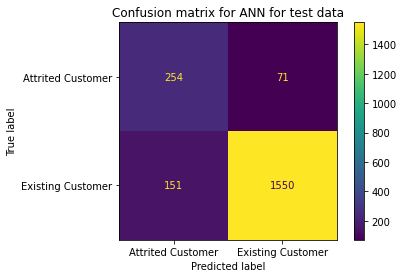

In [ ]:
sm.plot_confusion_matrix(qda_clf,X_test,y_test)
plt.title('Confusion matrix for ANN for test data')
plt.show()

K FOLDS Cross validation:

In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier


skf = StratifiedKFold(n_splits=5)

## DATA
df = pd.read_csv('../content/sample_data/credit_card_churn.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
target = df.loc[:,'Attrition_Flag']

### label encoding data
from sklearn.preprocessing import LabelEncoder
label_dict= {col:LabelEncoder() for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']}
for col in ['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category']:
    df[col]= label_dict[col].fit_transform(df[col])

##Model
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

fold_no = 1
for train_index, test_index in skf.split(df, target):
  #Splitting train/test data
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  X_train= train.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_train= train['Attrition_Flag']
  X_test =test.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
  y_test =test['Attrition_Flag']

  #Oversampling
  from imblearn.over_sampling import RandomOverSampler
  oversample= RandomOverSampler(sampling_strategy=0.4)
  X_train,y_train= oversample.fit_resample(X_train,y_train)

  mlp.fit(X_train,y_train)
  prediction= mlp.predict(X_test)
  print('test data results for fold #',fold_no)
  get_metrics(y_test,prediction)

  fold_no += 1

test data results for fold # 1
The accuracy of model is 0.6959526159921027

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.33      0.84      0.47       326
Existing Customer       0.96      0.67      0.79      1700

         accuracy                           0.70      2026
        macro avg       0.64      0.76      0.63      2026
     weighted avg       0.86      0.70      0.74      2026

test data results for fold # 2
The accuracy of model is 0.7912142152023692

-----------The classification report is ----------
                   precision    recall  f1-score   support

Attrited Customer       0.40      0.63      0.49       326
Existing Customer       0.92      0.82      0.87      1700

         accuracy                           0.79      2026
        macro avg       0.66      0.73      0.68      2026
     weighted avg       0.84      0.79      0.81      2026

test data results for fold # 3
T